In [944]:
import pandas as pd

In [945]:
%matplotlib notebook
from matplotlib import pyplot as plt

In [946]:
from sklearn.decomposition import PCA

In [947]:
from numpy import linalg as LA

In [948]:
num_clusters = 5

In [949]:
pca = PCA(n_components=2)

In [950]:
data_set = pd.read_csv("cho.txt", sep = '\t', lineterminator = '\n',header = -1)

In [951]:
data_set.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,1,1,-0.69,-0.96,-1.16,-0.66,-0.55,0.12,-1.07,-1.22,0.82,1.40,0.71,0.68,0.110,-0.04,0.190,0.82
1,2,1,-0.21,0.19,0.86,0.04,-0.35,-0.39,-0.51,-0.20,0.00,0.77,0.41,0.14,-0.450,-1.23,-0.325,0.00
2,3,1,-0.30,-0.56,-0.29,-0.50,-0.27,-0.29,-0.56,-1.04,0.32,0.90,0.45,0.17,0.164,-0.12,-0.160,0.67
3,4,1,0.07,0.26,-0.47,-0.68,-0.63,-0.39,0.07,0.79,0.58,0.31,-0.14,-0.29,-0.103,-0.20,-0.060,0.36
4,5,1,-1.04,0.13,0.51,-0.44,-0.88,-0.32,0.21,0.95,1.07,0.38,0.01,-0.13,-0.780,-0.13,0.092,0.00


In [952]:
data_set_1 = data_set[data_set[1]!=-1]

In [953]:
ground_truth = data_set_1[1]

In [954]:
data_set_1 = data_set_1.loc[:,2:]

In [955]:
data_set_1.head(3)

,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,-0.69,-0.96,-1.16,-0.66,-0.55,0.12,-1.07,-1.22,0.82,1.40,0.71,0.68,0.110,-0.04,0.190,0.82
1,-0.21,0.19,0.86,0.04,-0.35,-0.39,-0.51,-0.20,0.00,0.77,0.41,0.14,-0.450,-1.23,-0.325,0.00
2,-0.30,-0.56,-0.29,-0.50,-0.27,-0.29,-0.56,-1.04,0.32,0.90,0.45,0.17,0.164,-0.12,-0.160,0.67


In [956]:
projected = pca.fit_transform(data_set_1)

In [957]:
pca.fit(data_set_1)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

### Visualization of data points by PCA before clustering by HAC

<IPython.core.display.Javascript object>


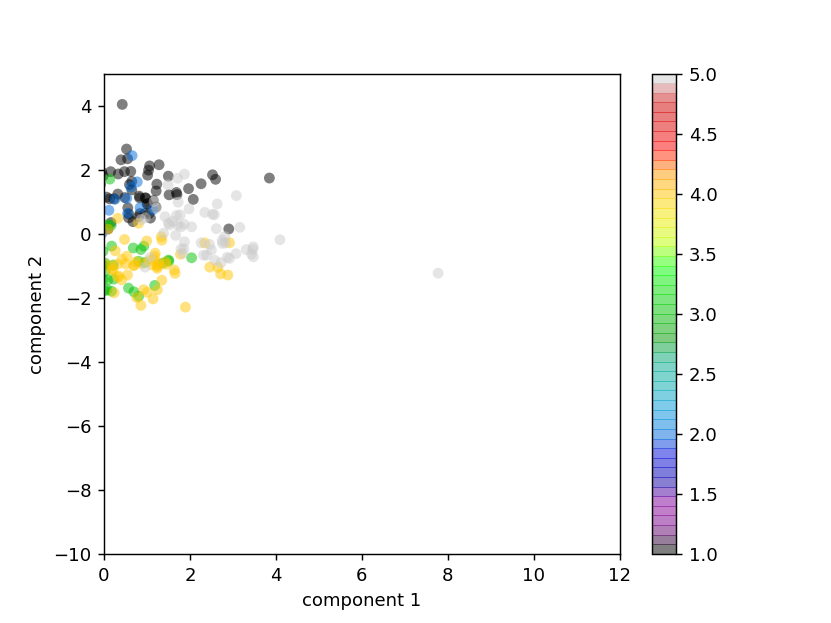

In [958]:
plt.scatter(projected[:, 0], projected[:, 1],
            c=ground_truth, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('nipy_spectral', 50))
plt.figure(1, figsize=(20, 5))
plt.axis([0,12,-10,5])
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

In [811]:
plt.show()

In [959]:
data_set_1.head(3)

,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,-0.69,-0.96,-1.16,-0.66,-0.55,0.12,-1.07,-1.22,0.82,1.40,0.71,0.68,0.110,-0.04,0.190,0.82
1,-0.21,0.19,0.86,0.04,-0.35,-0.39,-0.51,-0.20,0.00,0.77,0.41,0.14,-0.450,-1.23,-0.325,0.00
2,-0.30,-0.56,-0.29,-0.50,-0.27,-0.29,-0.56,-1.04,0.32,0.90,0.45,0.17,0.164,-0.12,-0.160,0.67


In [960]:
a = pd.DataFrame(data_set_1.loc[:1,:])

In [961]:
a

,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,-0.69,-0.96,-1.16,-0.66,-0.55,0.12,-1.07,-1.22,0.82,1.40,0.71,0.68,0.11,-0.04,0.190,0.82
1,-0.21,0.19,0.86,0.04,-0.35,-0.39,-0.51,-0.20,0.00,0.77,0.41,0.14,-0.45,-1.23,-0.325,0.00


In [962]:
b = pd.DataFrame(data_set_1.loc[246:246,:])

In [963]:
b

,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
246,0.46,-0.05,1.86,0.36,-1.03,-0.93,-0.6,-1.25,-0.6,0.74,0.89,0.62,0.26,-0.48,-0.35,-0.19


In [964]:
LA.norm(a - b)

nan

In [965]:
print(b)

       2     3     4     5     6     7    8     9    10    11    12    13  \
246  0.46 -0.05  1.86  0.36 -1.03 -0.93 -0.6 -1.25 -0.6  0.74  0.89  0.62   

       14    15    16    17  
246  0.26 -0.48 -0.35 -0.19  


In [966]:
from scipy.spatial import distance

In [967]:
import numpy as np

In [968]:
data_set_1.shape[0]

386

In [969]:
data_set_1 = data_set_1.dropna()

In [988]:
data_set_1.shape[0]

386

Distance Matrix calculation

In [989]:
def dist_matrix(data_points):
    matrix = np.zeros((len(data_points),len(data_points)))
    for i in range(len(data_points)):
        for j in range(len(data_points)):
            dst = distance.euclidean(data_points[i], data_points[j])
            matrix[i,j] = dst
    return matrix

In [990]:
def row_value(matrix):
    matrix1 = matrix[np.nonzero(matrix)]
    min_value = matrix1.min()
    #print (min_value)
    row_count = 0
    for rows in matrix:
        rows = [y for y in rows if y > 0]
        if(len(rows) > 0):
            if min(rows) == min_value:
                break
            row_count = row_count + 1
    for j in range(matrix.shape[0]):
        if matrix[row_count][j] == min_value:
            return row_count, j
        
    return row_count, -1

Cluster update

In [991]:
def update_default_clusters(default_clusters,row_count,col_count):
    min_val = min(row_count,col_count)
    max_val = max(row_count,col_count)
    for i in range(len(default_clusters)):
        if default_clusters[i] == default_clusters[max_val]:
            default_clusters[i] = default_clusters[min_val]
   # print(len(default_clusters),row_count,col_count)
    default_clusters[max_val] = default_clusters[min_val]
    return default_clusters

Jaccard coefficient calculation

In [992]:
def calc_jaccard(default_clusters):
    default_clusters_set = sorted(set(default_clusters))
   # print (len(default_clusters_set))
    clusters_map = {}
    for i in range(len(default_clusters_set)):
        clusters_map[default_clusters_set[i]] = i+1
    count = 1
    cluster_id = 1
    for i in range(len(default_clusters)):
        default_clusters[i] = clusters_map[default_clusters[i]]
    ground_truth_map = {}
    index = 0
    for i in ground_truth.index.values:
        ground_truth_map[index] = i
        index = index + 1
    return jaccard_coefficient(ground_truth,default_clusters,ground_truth_map)

HAC Algorithm

In [993]:
def perform_HAC(default_clusters,matrix):
    matrix = dist_matrix(data_points)
    while matrix.shape[0] > num_clusters:
        row_count, col_count = row_value(matrix)
        a = data_points[row_count].values
        b = data_points[col_count].values
        c = np.minimum.reduce([a,b])
        min_value = min(row_count,col_count)
        max_value = max(row_count,col_count)
        data_points[min_value] = pd.DataFrame(c)
        default_clusters = update_default_clusters(default_clusters,min(clusters_list[min_value]),max(clusters_list[max_value]))
        clusters_list[min_value] = clusters_list[min_value] + clusters_list[max_value]
        del clusters_list[max_value]
        del data_points[max_value]
        a = matrix[row_count]
        b = matrix[col_count]
        c = np.minimum.reduce([a,b])
        matrix[min_value] =  c
        matrix[:,min_value] =  c
        matrix = np.delete(matrix,[max_value],0)
        matrix = np.delete(matrix,[max_value],1)
    jaccard_coefficient = calc_jaccard(default_clusters)
    print ("jaccard_coefficient")
    print (jaccard_coefficient)
    return default_clusters

In [994]:
matrix = np.zeros((data_set_1.shape[0],data_set_1.shape[0]))
matrix1 = matrix[np.nonzero(matrix)]

In [995]:
clusters_list = []
for i in range(data_set_1.shape[0]):
    list = []
    list.append(i)
    clusters_list.append(list)

In [996]:
data_points = []
default_clusters = []

In [997]:
for i in range(data_set.shape[0]):
    df = data_set_1.loc[i:i,:]
    if len(df) > 0:
        data_points.append(df)
default_clusters = [i+1 for i in range(len(data_points))]

In [998]:
def hac_min(default_clusters):
    num_clusters = 5
    default_clusters = perform_HAC(default_clusters,matrix)

### Jaccard coefficient

#### Incidence Matrix

In [999]:
def incidence_matrix(ground_truth,default_clusters,ground_truth_map):
    incidence_matrix = np.zeros((len(default_clusters),len(default_clusters)))
    incidence_matrix_p = np.zeros((len(default_clusters),len(default_clusters)))
    incidence_matrix_c = np.zeros((len(default_clusters),len(default_clusters)))
    for i in range(len(default_clusters)):
        for j in range(len(default_clusters)):
            if default_clusters[i] == default_clusters[j]:
                incidence_matrix_c[i][j] = 1
            else:
                incidence_matrix_c[i][j] = 0
            if ground_truth[ground_truth_map[i]] == ground_truth[ground_truth_map[j]]:
                incidence_matrix_p[i][j] = 1
            else:
                incidence_matrix_p[i][j] = 0
    return incidence_matrix_c,incidence_matrix_p

In [1000]:
def jaccard_coefficient(ground_truth,default_clusters,ground_truth_map):
    index = 0
    M11 = 0
    M00 = 0
    M10 = 0
    M01 = 0
    incidence_matrix_c,incidence_matrix_p = incidence_matrix(ground_truth,default_clusters,ground_truth_map)
    for i in range(len(default_clusters)):
        for j in range(len(default_clusters)):
            if incidence_matrix_p[i][j] == 1 and incidence_matrix_c[i][j] == 1:
                M11 = M11 + 1
            elif incidence_matrix_p[i][j] == 0 and incidence_matrix_c[i][j] == 0:
                M00 = M00 + 1
            elif incidence_matrix_p[i][j] == 1 and incidence_matrix_c[i][j] == 0:
                M10 = M10 + 1
            elif incidence_matrix_p[i][j] == 0 and incidence_matrix_c[i][j] == 1:
                M01 = M01 + 1
            index = index + 1
#    print (M11,M10,M01)
    jaccard_coeff = M11 / (M11 + M10 + M01)
    return jaccard_coeff

In [1001]:
hac_min(default_clusters)

jaccard_coefficient
0.2297361848480299


In [1002]:
default_clusters = pd.Series(default_clusters)

In [1003]:
projected = pca.fit_transform(data_set_1)

In [1004]:
pca.fit(data_set_1)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

### Visualization of data points by PCA after clustering by HAC

<IPython.core.display.Javascript object>


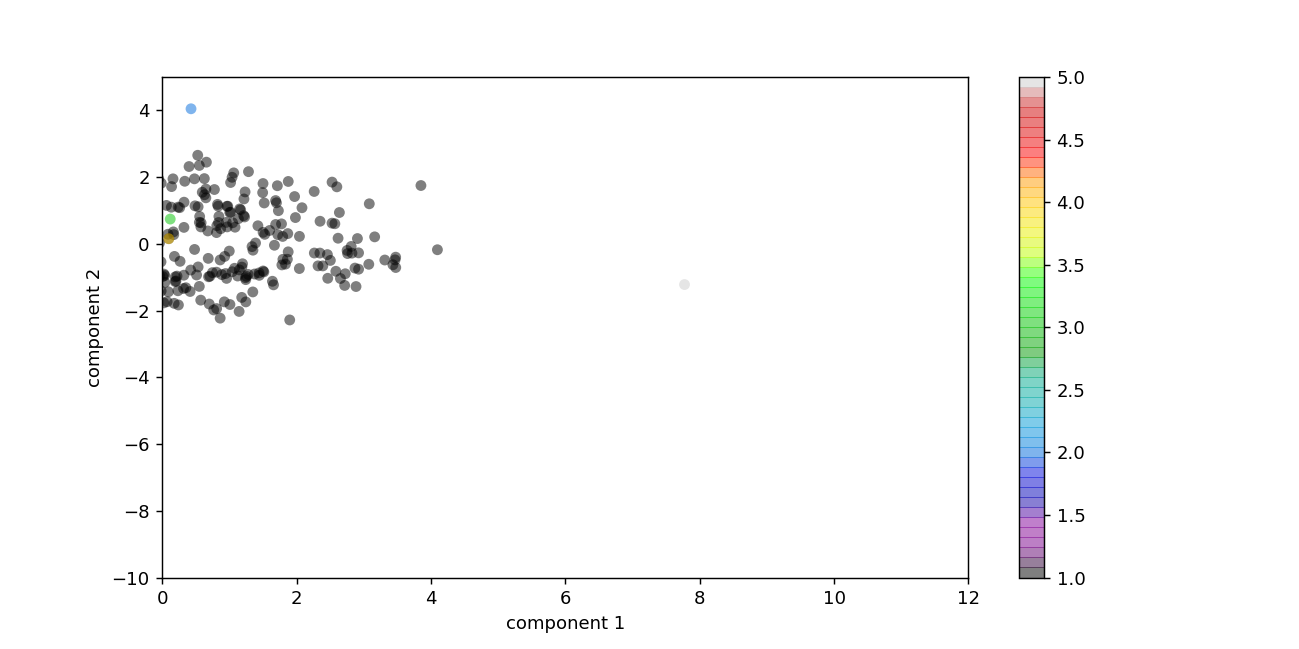

In [987]:
%matplotlib notebook
plt.figure(2, figsize=(10, 5))
plt.scatter(projected[:, 0], projected[:, 1],
            c=default_clusters, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('nipy_spectral', 50))
plt.figure(2, figsize=(20, 5))
plt.axis([0,12,-10,5])
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();